<a href="https://colab.research.google.com/github/kapibara3chi/LSTM_test/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.pip

In [2]:
!pip install keras
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install yfinance
!pip install optuna tensorflow

# Ref code

出来高を考慮した予測

始値、安値、高値を考慮した予測

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  44.730000  45.189999  44.500000  45.189999  43.365040  1826300
2018-01-03  45.270000  46.090000  45.250000  45.990002  44.132736  2150800
2018-01-04  46.380001  46.869999  46.320000  46.570000  44.689312  2632000
2018-01-05  47.029999  47.560001  46.740002  47.450001  45.533768  1928900
2018-01-08  47.419998  47.820000  47.250000  47.740002  45.812069  1992500
scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data scaled_data 
[[0.21874023]
 [0.22460143]
 [0.23296342]
 ...
 [0.76844323]
 [0.74265395]
 [0.75070333]]
training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len training_data_len 
1269
train_data.shapetrain_data.shapetrain_data.shapetrain_data.shapetrain_data.sha

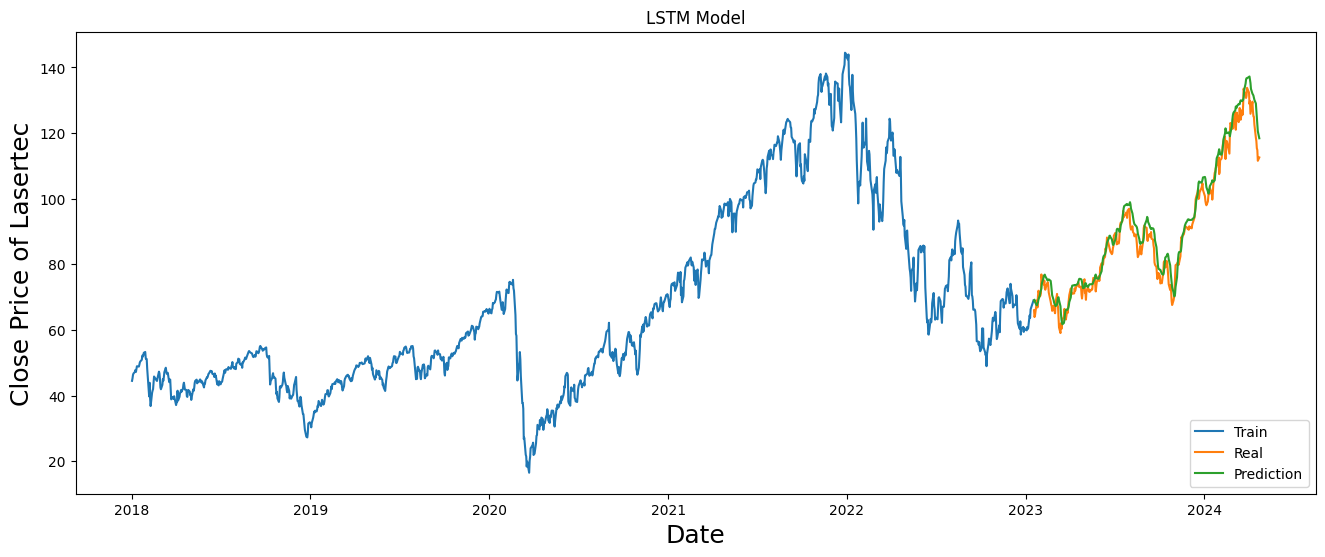

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
print(df.head())

#　Closeコラムのみ抽出
data = df.filter(["Low"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print("scaled_data "*10)
print(scaled_data)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
print("training_data_len "*10)
print(training_data_len)

train_data = scaled_data[0: int(training_data_len), :]
print("train_data.shape"*10)
print(train_data.shape)

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
print("x_train.shape"*10)
print(x_train.shape)


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
test_score = np.sqrt(mean_squared_error(y_test,predictions))
print('Test Score: %.2f RMSE' % (test_score))

train = data[: training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price of Lasertec', fontsize =18)
plt.plot(train['Low'])
plt.plot(valid[['Low','Predictions']])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()

# RMSE算出のテストデータと予測データの日付修正、予測値のグラフを1日シフトし日付を修正

[*********************100%%**********************]  1 of 1 completed


df:(80, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  101.879997  102.839996  100.760002  102.120003  101.803108   
2024-01-03  100.699997  101.199997   99.250000   99.629997   99.320831   
2024-01-04   99.269997  100.930000   98.440002   98.629997   98.323936   
2024-01-05   98.650002  100.550003   98.000000   98.930000   98.623009   
2024-01-08   99.220001  103.230003   99.150002  103.099998  102.780067   

              Volume  
Date                  
2024-01-02   8732800  
2024-01-03  11632600  
2024-01-04   7422300  
2024-01-05  10963500  
2024-01-08   8596400  
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-19  115.379997  116.099998  111.540001  112.550003  112.550003   
2024-04-22  114.209999  117.309998  112.570000  115.449997  115.449997   
2024-04-23  1

1/1 [==============================] - 1s 757ms/step
prediction shape(16, 1)
len predictions:16
[[145.73607]
 [146.01422]
 [146.23633]
 [146.40443]
 [146.54367]
 [146.56143]
 [146.56439]
 [146.40858]
 [146.02823]
 [145.46434]
 [144.70938]
 [143.80174]
 [142.71661]
 [141.59346]
 [140.56313]
 [139.62273]]
次の日の予測株価: 139.6227264404297
Test Score: 24.00 RMSE
valid add predictions*********************************:16
                 Close  Predictions
Date                               
2024-04-19  112.550003   143.801743
2024-04-22  115.449997   142.716614
2024-04-23  119.510002   141.593460
2024-04-24  119.349998   140.563126
2024-04-25  117.839996   139.622726
            Predictions
2024-04-22   143.801743
2024-04-23   142.716614
2024-04-24   141.593460
2024-04-25   140.563126
2024-04-26   139.622726


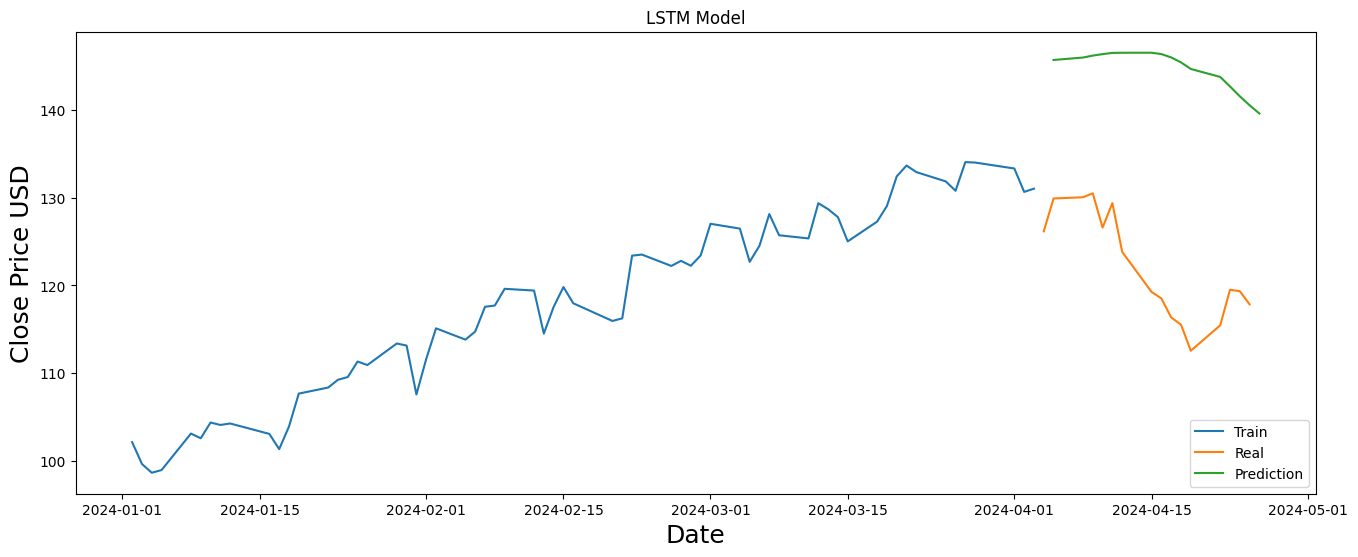

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2024-01-01',end = datetime.now(),interval="1d")
print(f'df:{df.shape}')
print(df.head())
print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(["Close"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))

train_data = scaled_data[0: int(training_data_len), :]
# print(f'train_data.shape:{train_data.shape}')

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
# print(f'x_train.shape:{x_train.shape}')


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
# print(f'len x_test:{x_test.shape}')
# print(x_test[0])
# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# print(f'prediction shape{predictions.shape}')
# print(f'len predictions:{len(predictions)}')
# print(predictions)
print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
### predictionsの最後のデータはy_testと対応しないので削除
predictions_adjusted = predictions[:-1]
# print(f'predictions_adjusted:{len(predictions_adjusted)}')
# print(predictions_adjusted)
# 予測値を含む新しいDataFrameを作成

# y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
y_test_shifted = y_test[1:]

test_score = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
print('Test Score: %.2f RMSE' % (test_score))
# print(f'y_test*********************************:{len(y_test)}')
# print(y_test)
# print(f'predictions*********************************:{len(predictions)}')
# print(predictions)


train = data[: training_data_len]
# print(f'train*********************************:{len(train)}')
# print(train.tail())
valid = data[training_data_len:]
# print(f'valid*********************************:{len(valid)}')
# print(valid.tail())
# print(valid)
# validデータセットに予測値を追加
# valid['Predictions'] = predictions
# print("predictions*********************************")
# print(len(predictions))
# print(predictions)

# validデータセットに予測値を追加
valid['Predictions'] = predictions
print(f'valid add predictions*********************************:{len(valid)}')
print(valid.tail())
# 予測値の日付を1日進める
# print(f'prediction index*************')
next_day=valid.index[-1]+pd.DateOffset(days=1)
# print(f'new day:{next_day}')
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# print(predictions_index)
# print(f'prediction index len; {len(predictions_index)}')
# print(predictions_index)
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=predictions, index=predictions_index, columns=['Predictions'])
print(predictions_df.tail())
# グラフ化
plt.figure(figsize = (16,6))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close Price USD', fontsize =18)
plt.plot(train['Close'])
# plt.plot(valid['Close'],marker='o')
plt.plot(valid['Close'])
plt.plot(predictions_df['Predictions'])
plt.legend(['Train','Real','Prediction'], loc='lower right')
plt.show()

# グラフ plotly化

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(["Close"])
dataset = data.values
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0: int(training_data_len), :]

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))


# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 1, epochs =1)

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
   x_test.append(test_data[i-60:i,0])
y_test = dataset[training_data_len:, :]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

# 予測値の算出
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
### predictionsの最後のデータはy_testと対応しないので削除
predictions_adjusted = predictions[:-1]
### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
y_test_shifted = y_test[1:]
test_score = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
print('Test Score: %.2f RMSE' % (test_score))


train = data[: training_data_len]
valid = data[training_data_len:]

#予測データとvalidデータの日付を対応するよう修正
# validデータセットに予測値を追加
valid['Predictions'] = predictions
# 予測値の日付を1日進める
next_day=valid.index[-1]+pd.DateOffset(days=1)
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=predictions, index=predictions_index, columns=['Predictions'])

# グラフ化
import plotly.graph_objs as go

# 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

# データをリストにまとめる
data = [train_trace, valid_trace, predictions_trace]

# レイアウトを定義
layout = go.Layout(
    title='LSTM Model',
    xaxis={'title': 'Date'},
    yaxis={'title': 'Close Price USD'},
    hovermode='closest'
)

# フィギュアを定義し、データとレイアウトを組み合わせる
fig = go.Figure(data=data, layout=layout)

# グラフを表示
fig.show()

[*********************100%%**********************]  1 of 1 completed


df:(1589, 6)
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2018-01-02  44.730000  45.189999  44.500000  45.189999  43.365036  1826300
2018-01-03  45.270000  46.090000  45.250000  45.990002  44.132736  2150800
2018-01-04  46.380001  46.869999  46.320000  46.570000  44.689312  2632000
2018-01-05  47.029999  47.560001  46.740002  47.450001  45.533772  1928900
2018-01-08  47.419998  47.820000  47.250000  47.740002  45.812057  1992500
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-19  115.379997  116.099998  111.540001  112.550003  112.550003   
2024-04-22  114.209999  117.309998  112.570000  115.449997  115.449997   
2024-04-23  116.879997  119.870003  116.500000  119.510002  119.510002   
2024-04-24  120.150002  120.720001  117.739998  119.349998  119.349998   
2024-04-25  114.79

# 終値以外のデータを考慮したモデル

In [ ]:
import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2018-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values

#　データの正規化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.8))
train_data = scaled_data[0: int(training_data_len), :]

#訓練データの取得
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, 3])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
print(f'x_train shape:{x_train.shape}')

# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM

#LSTMモデル構築
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape=(x_train.shape[1], x_train.shape[2])))

model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error')

#訓練用モデル構築
model.fit(x_train, y_train, batch_size = 10, epochs =100)

#
# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,:])
  y_test = dataset[training_data_len:, 3]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
print(f'x_test shape:{x_test.shape}')

# 予測値の算出
predictions = model.predict(x_test)
# 予測値の配列を拡張
predictions_extended = np.zeros((len(predictions), 5))
predictions_extended[:, 3] = predictions[:, 0]  # 'Close' 価格の予測値を4番目の列にセット
# スケール逆変換を適用
predictions_scaled = scaler.inverse_transform(predictions_extended)
# 'Close' 価格の予測値のみを取り出す
final_predictions = predictions_scaled[:, 3]
# print(f'final predictions:{final_predictions.shape}')
# print(final_predictions)
# predictions = scaler.inverse_transform(predictions)
# print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")
print(f"次の日の予測株価: {final_predictions[-1]}")

# RMSEを利用して予測精度を確認
from sklearn.metrics import mean_squared_error
## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
### predictionsの最後のデータはy_testと対応しないので削除
predictions_adjusted = final_predictions[:-1]
### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
y_test_shifted = y_test[1:]
print(f'y test shifted shape:{y_test_shifted.shape}')
print(f'prediction_scaled:{predictions_scaled.shape}')
test_score = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
print('Test Score: %.2f RMSE' % (test_score))


train = data[: training_data_len]
valid = data[training_data_len:]

#予測データとvalidデータの日付を対応するよう修正
# validデータセットに予測値を追加
valid['Predictions'] = final_predictions
# 予測値の日付を1日進める
next_day=valid.index[-1]+pd.DateOffset(days=1)
predictions_index = valid.index.append(pd.Index([next_day]))
predictions_index=predictions_index[1:]
# 予測値を含む新しいDataFrameを作成
predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

# グラフ化
import plotly.graph_objs as go

# 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

# データをリストにまとめる
data = [train_trace, valid_trace, predictions_trace]

# レイアウトを定義
layout = go.Layout(
    title='LSTM Model',
    xaxis={'title': 'Date'},
    yaxis={'title': 'Close Price USD'},
    hovermode='closest'
)

# フィギュアを定義し、データとレイアウトを組み合わせる
fig = go.Figure(data=data, layout=layout)

# グラフを表示
fig.show()

[*********************100%%**********************]  1 of 1 completed


x_train shape:(1216, 60, 5)
Epoch 1/100
122/122 [==============================] - 14s 59ms/step - loss: 0.0079
Epoch 2/100
122/122 [==============================] - 8s 66ms/step - loss: 0.0017
Epoch 3/100
122/122 [==============================] - 7s 57ms/step - loss: 0.0015
Epoch 4/100
122/122 [==============================] - 8s 66ms/step - loss: 0.0013
Epoch 5/100
122/122 [==============================] - 8s 69ms/step - loss: 0.0011
Epoch 6/100
122/122 [==============================] - 7s 58ms/step - loss: 0.0010
Epoch 7/100
122/122 [==============================] - 8s 66ms/step - loss: 0.0011
Epoch 8/100
122/122 [==============================] - 7s 58ms/step - loss: 8.7073e-04
Epoch 9/100
122/122 [==============================] - 8s 66ms/step - loss: 8.3680e-04
Epoch 10/100
122/122 [==============================] - 8s 66ms/step - loss: 7.1430e-04
Epoch 11/100
122/122 [==============================] - 7s 58ms/step - loss: 7.5698e-04
Epoch 12/100
122/122 [==================

SystemExit: 

# Optinaによる最適化

## スカラー値の予測コード

### pip

In [ ]:
!pip install optuna tensorflow
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 6.2 MB/s eta 0:00:00


### code

In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler



# データセットの準備（ここでは合成データセットを使用）
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# データのスケーリング
scaler = StandardScaler()
# scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)

# class PruningCallback(tf.keras.callbacks.Callback):
#     def __init__(self, trial, pruner):
#         self._trial = trial
#         self._pruner = pruner

#     def on_epoch_end(self, epoch, logs=None):
#         # 現在のエポックの損失を報告
#         current_loss = logs.get('val_loss')
#         self._trial.report(current_loss, epoch)

#         # 他のトライアルの結果を考慮して、プルーニングするかどうかを判断
#         if self._trial.should_prune():
#             message = "Trial was pruned at epoch {}.".format(epoch)
#             raise optuna.exceptions.TrialPruned(message)

class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definitinon(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(X_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers = trial.suggest_int('n_layers', 1, 5 )
    n_units_per_layer = [trial.suggest_int(f'n_units_layer{i}', 8, 128) for i in range(n_layers)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definitinon(n_units_per_layer,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)
      # model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,
      #           batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint ], verbose=0)

      # 最良のモデルの評価
      model.load_weights('model.keras')
      loss = model.evaluate(X_test, y_test, verbose=0)
     # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          best_model = model
      # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)

    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=20
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    #最適モデル構築from trial最適化時のlossにはならない
    print("***loaded best model***")
    tm=TestModel()
    model=tm.build_model_from_trial(trial)
    batch_size=trial.params['batch_size']
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(X_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(X_test)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

# code

In [3]:
import optuna
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import InputLayer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.layers import BatchNormalization
import pandas as pd
import sys
import os
import pickle
import re
import glob
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler


import keras
import pandas as pd
from datetime import datetime
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import sys
# kerasから必要なライブラリを導入
from keras.models import Sequential
from keras.layers import Dense, LSTM
#　データの正規化
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import plotly.graph_objs as go


# df = yf.download("6920.T",start='2018-01-01',end = datetime.now(),interval="1d")
df = yf.download("SPXL",start='2023-01-01',end = datetime.now(),interval="1d")
# print(f'df:{df.shape}')
# print(df.head())
# print(df.tail())


#　Closeコラムのみ抽出
data = df.filter(['Open', 'High', 'Low', 'Close', 'Volume'])  # 複数の特徴量を選択
dataset = data.values
# dfの列数を取得
num_columns=data.shape[1]
# print(f'clmn number:{num_columns}')

# 目的変数の列番号を取得
y_column_name = 'Close'#input
y_column_number = data.columns.get_loc(y_column_name)

#　データの正規化
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# データを訓練データと検証データに分割し、7割が訓練用に設定
training_data_len = int(np.ceil(len(dataset) * 0.7))
train_data = scaled_data[0: int(training_data_len), :]
train = data[: training_data_len]
valid = data[training_data_len:]

#訓練データの取得
window_size = 60#input
x_train = []
y_train = []
for i in range(window_size, len(train_data)):
  x_train.append(train_data[i-window_size:i, :])  # すべての特徴量を含む
  y_train.append(train_data[i, y_column_number])  # 'Close'の値のみをターゲットとして使用
# 訓練データのreshape
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], data.shape[1]))
# print(f'x_train shape:{x_train.shape}')

# 検証用データを取得とデータ変換
test_data = scaled_data[training_data_len - window_size: , :]
x_test = []
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i-window_size:i,:])
  y_test = dataset[training_data_len:, y_column_number]

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], data.shape[1]))
# print(f'x_test shape:{x_test.shape}')



#LSTMモデル構築
def model_definition(lstm_units,dense_units,optimizer_name,lr):
    model = Sequential()
    model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2])))

    #LSTM層の定義
    for i,n_lstm in enumerate(lstm_units):
        if i==len(lstm_units)-1:
            model.add(LSTM(n_lstm,return_sequences=False))
        else:
            model.add(LSTM(n_lstm,return_sequences=True))
    #Dense層の定義
    for n_dense in dense_units:
        model.add(Dense(n_dense))
    model.add(Dense(1))

    model.compile(optimizer='adam',loss='mean_squared_error')


    # オプティマイザの設定
    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Lion':
        optimizer = tf.keras.optimizers.Lion(learning_rate=lr)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model




# プルーニングコールバックの作成
class PruningCallback(tf.keras.callbacks.Callback):
    def __init__(self, trial, pruner):
        self._trial = trial
        self._pruner = pruner
        self._reported_epoch = set()  # 重複報告を避けるために追加

    def on_epoch_end(self, epoch, logs=None):
        if epoch in self._reported_epoch:
            return  # 既に報告されたエポックはスキップ

        current_loss = logs.get('val_loss')
        self._trial.report(current_loss, epoch)
        self._reported_epoch.add(epoch)  # 報告したエポックを記録

        if self._trial.should_prune():
            message = "Trial was pruned at epoch {}.".format(epoch)
            raise optuna.exceptions.TrialPruned(message)


class TestModel():
  def __init__(self):
    pass

  # 最適化されたハイパーパラメータを使用してモデルを構築する関数
  def build_model_from_trial(self,trial):
      #モデルパラメータの取得
      # print(f'trial params:{trial.params}')
      units_len=trial.params['n_layers']
      units=[value for key,value in trial.params.items() if 'n_units_layer' in key]
      learning_rate=trial.params['lr']
      optimizer_name=trial.params['optimizer']
      # print(f'optimizer name:{optimizer_name}')
      # print(f'lr:{learning_rate}')
      # print(f'n layers:{len(units)}')
      # print(f'units:{units}')

      # モデルの構築
      model=model_definitinon(units,optimizer_name,learning_rate)
      # model=self.model_from_input(units,learning_rate,optimizer_name)

      return model

  def save_keras_model(self,model_save_path):
    #kerasモデル保存
    # model_save_path = './model'+str(trial.number)
    tf.keras.models.save_model(model, model_save_path)


  def load_keras_model(self,model_save_path):
    #kerasモデル読み込み
    # model_save_path = './model'+str(trial.number)
    loaded_model = tf.keras.models.load_model(model_save_path)
    # loaded_model.summary()
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best keras model loss;{loss}')
    return loaded_model


  def build_model_from_pickle(self,pickle_path,trial_number):
    #指定したpickleファイルのtrial_numberのモデルを読み込み
    pickle_path='trials.pkl'
    # 保存したtrialsを読み込む
    with open(pickle_path, 'rb') as f:
        loaded_trials = pickle.load(f)

    # 読み込んだtrialsを表示
    print(f'loaded trials:{loaded_trials}')
    for i in loaded_trials:
      print(f'trials{str(i.number)}:{i}')

    # 指定したtrialのモデルを読み込み
    return self.build_model_from_trial(trial_number)

def model_definition_scalar(n_units_per_layer,optimizer_name,lr):
    model = tf.keras.models.Sequential()
    model.add(Dense(n_units_per_layer[0], activation='relu', input_shape=(x_train.shape[1],)))
    for units in n_units_per_layer[1:]:
      model.add(Dense(units, activation='relu',kernel_initializer=HeNormal()))
      model.add(BatchNormalization())
    model.add(Dense(1, activation='linear'))

    # オプティマイザの設定
    if optimizer_name == 'Adam':
        # optimizer = Adam(lr=lr)
        # optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=lr)
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    # elif optimizer_name == 'SGD':
    #     # optimizer = SGD(lr=lr)
    #     optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=lr)
    else:
        # optimizer = RMSprop(lr=lr)
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr)
        # optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=lr)

    # モデルのコンパイル
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model



# 目的関数の定義
def objective(trial):
    #ハイパーパラメータの提案
    ## オプティマイザの提案※SGDは使用しない
    # optimizer_options = ['Adam', 'SGD', 'RMSprop']
    optimizer_options = ['Adam', 'RMSprop']
    optimizer_name = trial.suggest_categorical('optimizer', optimizer_options)
    ## 学習率の提案
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True)
    ## 各層の数、ユニット数の提案
    n_layers_lstm = trial.suggest_int('n_layers', 1, 3 )
    n_layers_dense = trial.suggest_int('n_layers', 1, 3 )
    lstm_units = [trial.suggest_int(f'n_units_layer_lstm{i}', 8, 128) for i in range(n_layers_lstm)]
    dense_units = [trial.suggest_int(f'n_units_layer_dense{i}', 8, 128) for i in range(n_layers_dense)]
    # バッチサイズの提案
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    # モデルの構築
    model=model_definition(lstm_units,dense_units,optimizer_name,lr)

    # EarlyStoppingコールバックを作成
    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

    # チェックポイントコールバックの設定 epoch中のmin lossのモデルを採用
    checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True, verbose=0)

    # プルーニングコールバックのインスタンスを作成
    pruning_callback = PruningCallback(trial, optuna.pruners.MedianPruner())

    #同一パラメータでの最適モデルの選択
    num_runs=3#input
    best_model = None
    best_val_loss = float('inf')  # 初期値を無限大に設定
    for _ in range(num_runs):
      # モデルの訓練
      model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,
                batch_size=batch_size,callbacks=[early_stopping_callback,checkpoint,
                                                 pruning_callback], verbose=0)

      #==========================lossの計算をメソッドにしたい
      # 予測値の算出
      predictions = model.predict(x_test)
      # print(f'predicions:{predictions}')
      # 予測値のスケール逆変換
      # 予測値の配列を拡張
      predictions_extended = np.zeros((len(predictions), num_columns))
      predictions_extended[:, y_column_number] = predictions[:, 0]  # 'Close' 価格の予測値を列にセット
      # スケール逆変換を適用
      predictions_scaled = scaler.inverse_transform(predictions_extended)
      # 'Close' 価格の予測値のみを取り出す
      final_predictions = predictions_scaled[:, y_column_number]
      # print(f'final predictions:{final_predictions.shape}')
      # print(final_predictions)
      # print(f"次の日の予測株価: {predictions[len(predictions)-1,0]}")
      print(f"次の日の予測株価: {final_predictions[-1]}")

      # RMSEを利用して予測精度を確認
      ## predictionsは次の日の終値なので、y_testデータと日付が対応するように修正したdfを作成
      ### predictionsの最後のデータはy_testと対応しないので削除
      predictions_adjusted = final_predictions[:-1]
      ### y_testの最初の日付はpredictionsには存在しないので、実際の終値を1日ずらす
      y_test_shifted = y_test[1:]
      # print(f'y test shifted shape:{y_test_shifted.shape}')
      # print(f'prediction_scaled:{predictions_scaled.shape}')
      loss = np.sqrt(mean_squared_error(y_test_shifted,predictions_adjusted))
      print('Test Score: %.2f RMSE' % (loss))

      # loss = model.evaluate(x_test, y_test, verbose=0)
      # num_runs中の最も良いモデルを判定
      if loss < best_val_loss:
          best_val_loss = loss
          print(f'best run number:{_},best loss:{loss}')
          best_model = model
    # model.summary()
    # num_runs中の最も良いモデルを選択
    loss=best_val_loss
    model=best_model

    # トライアル中の最終損失の計算
    print(f'final loss at this trial: {loss}')

    # best trialと最新モデル以外削除
    ## 過去のtrialの.kerasを削除
    pattern = re.compile(r'model_\d+\.keras$')
    # List all files in the directory
    cur_dir='.'
    files = os.listdir(cur_dir)
    for file in files:
      # If the file matches the pattern
      if pattern.match(file):
        # Delete the file
        os.remove(os.path.join(cur_dir, file))
        # print(f"Deleted file: {file}")
    # 現在のトライアルの.kerasモデルの保存
    model_save_path = './model_'+str(trial.number)+'.keras'
    model.save(model_save_path)



    #-----------from here

    #予測データとvalidデータの日付を対応するよう修正
    # validデータセットに予測値を追加
    valid['Predictions'] = final_predictions
    # 予測値の日付を1日進める
    next_day=valid.index[-1]+pd.DateOffset(days=1)
    predictions_index = valid.index.append(pd.Index([next_day]))
    predictions_index=predictions_index[1:]
    # 予測値を含む新しいDataFrameを作成
    predictions_df = pd.DataFrame(data=final_predictions, index=predictions_index, columns=['Predictions'])

    # グラフ化
    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    train_trace = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
    valid_trace = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Real')
    predictions_trace = go.Scatter(x=predictions_df.index, y=predictions_df['Predictions'], mode='lines', name='Prediction')

    # データをリストにまとめる
    data = [train_trace, valid_trace, predictions_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='LSTM Model',
        xaxis={'title': 'Date'},
        yaxis={'title': 'Close Price USD'},
        hovermode='closest'
    )

    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()
    return loss

def save_trial_data(study,trial):
    #パラメータを書き込み
    write_trial_to_file(study,trial)
    #モデルを保存
    save_model(study,trial)

def write_trial_to_file(study,trial):
    # CSVファイルのパスとカラム名を指定
    file_path = 'param.csv'
    # n_layers=5

    #列名が記載されたDataFrame作成
    columns = ['trial_number','loss','optimizer', 'lr', 'batch_size','n_layers']
    add_layer_columns=["n_units_layer"+str(i) for i in range(trial.params['n_layers'])]
    columns=columns+add_layer_columns
    # print(f"columns名：{columns}")
    trial_df=pd.DataFrame(columns=columns)

    # ハイパーパラメータとlossの値を辞書に格納
    trial_data = trial.params
    # print(trial.params)
    trial_data['loss'] = trial.value
    trial_data['trial_number'] = trial.number

    # DataFrameを作成
    data_df=pd.DataFrame([trial_data])
    trial_df=pd.concat([trial_df,data_df],ignore_index=True)
    # print(f"dic:{trial_data}")
    # print(f"dataframe:{trial_df}")

    # 履歴データを書き込み
    write_df_to_csv(file_path,trial_df)

def write_df_to_csv(file_path, data_df):
  #ファイル書き込みの関数を定義
    try:
      # 既存のCSVファイルがあるかチェック
      if os.path.isfile(file_path):
          # 既存のCSVファイルを読み込む
          existing_df = pd.read_csv(file_path)
          # 新しいデータを結合する
          ##※データ欠損は0で補完
          combined_df = pd.concat([existing_df, data_df], axis=0, ignore_index=True).fillna(0)
      else:
          # CSVファイルが存在しない場合は新しいDataFrameを作成
          combined_df = data_df

      # 結合したDataFrameをCSVに書き込む
      combined_df.to_csv(file_path, index=False)
    except Exception as e:
        # エラーが発生した場合の処理
        print(f'ファイル書き込み中にエラーが発生しました: {e}')

def save_model(study,trial):
    # 最新trialとモデルと最適モデルのみの.kerasモデルを保存する処理(保存自体はObjectiveで実施)+trial情報をplkで保存ためのコールバック関数
    # ここで必要に応じてstudy.trialsを保存する処理を追加
    trials_l = study.trials

    # trialsを外部ファイルに保存
    with open('trial_info.pkl', 'wb') as f:
        pickle.dump(trials_l, f)

    # print(f'trial number:{trial.number}')
    # print(f'best trial number;{study.best_trial.number}')
    # 現在のトライアルがbestトライアルならbest_trialとしてモデルを保存
    if trial.number==study.best_trial.number:
      load_model_path='./model_'+str(study.best_trial.number)+'.keras'
      best_model=tf.keras.models.load_model(load_model_path)
      model_save_path = './best_model.keras'
      best_model.save(model_save_path)
      print(f'Best trial trial number:{trial.number}')
      print(f'Model saved to {model_save_path}')




if __name__=="__main__":
    #トライアル回数の指定
    n_trials=30
    #最適化の再開(True)か新規最適化(False)
    resume_flag=False

    # RDB Backendを使用したチェックポイントの保存
    study_name = "example-study"
    storage_name = f"sqlite:///{study_name}.db"
    storage_path='./'+study_name+'.db'

    if resume_flag==True:
      # Studyオブジェクトの作成 → Hyper parameterの最適化
      study = optuna.create_study(direction='minimize',pruner=optuna.pruners.MedianPruner()
      ,study_name=study_name, storage=storage_name,load_if_exists=True)
      # study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name,load_if_exists=True)
    else:
      #初期化処理
      ## keras file 削除
      keras_files=glob.glob('./*.keras')
      for k_file in keras_files:
        os.remove(k_file)
      ## pkl削除
      pkl_path = './trial_info.pkl'
      if os.path.exists(pkl_path):
        os.remove(pkl_path)
      ## param.csv削除
      csv_path = './param.csv'
      if os.path.exists(csv_path):
        os.remove(csv_path)
      # 最適化DBの初期化 → 最適化開始
      if os.path.exists('./'+study_name+'.db'):
        os.remove(storage_path)
      study = optuna.create_study(direction='minimize',study_name=study_name, storage=storage_name)

    # 最適化の開始
    study.optimize(objective, n_trials=n_trials,callbacks=[save_trial_data])

    # 最適化されたハイパーパラメータの出力
    print('Number of finished trials:', len(study.trials))
    trial = study.best_trial
    print(f'Best trial:{trial.number}')
    print('Value: {}'.format(trial.value))
    print('Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

    print('**'*50)

    # #最適モデル構築from trial最適化時のlossにはならない
    # print("***loaded best model***")
    # tm=TestModel()
    # model=tm.build_model_from_trial(trial)
    # batch_size=trial.params['batch_size']
    # model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100,batch_size=batch_size, verbose=0)
    # loss = model.evaluate(x_test, y_test, verbose=0)
    # print(f'loaded best model from trial loss;{loss}')
    # print(model.summary())

    # 最適モデル構築 from .keras
    print("="*30)

    model_save_path = './best_model.keras'
    loaded_model = tf.keras.models.load_model(model_save_path)
    loss = loaded_model.evaluate(x_test, y_test, verbose=0)
    print(f'loaded best model from keras loss;{loss}')
    # print(model.summary())

    # 予測値の生成
    y_pred = loaded_model.predict(x_test)

    # グラフ化
    import plotly.graph_objs as go

    # 訓練データ、実際の価格、予測価格をプロットするためのTraceを作成
    valid_trace = go.Scatter(x=y_test, y=y_pred.flatten(), mode='markers', name='Real')

    # データをリストにまとめる
    data = [valid_trace]

    # レイアウトを定義
    layout = go.Layout(
        title='y_pred - y_test',
        xaxis={'title': 'y_test'},
        yaxis={'title': 'y_pred'},
        hovermode='closest'
    )
    # フィギュアを定義し、データとレイアウトを組み合わせる
    fig = go.Figure(data=data, layout=layout)

    # グラフを表示
    fig.show()

[*********************100%%**********************]  1 of 1 completed
[I 2024-05-08 21:25:30,818] A new study created in RDB with name: example-study


4/4 [==============================] - 1s 13ms/step
次の日の予測株価: -80.1447737054368
Test Score: 85.94 RMSE
4/4 [==============================] - 0s 19ms/step
次の日の予測株価: 519.6683352004111
Test Score: 401.25 RMSE
4/4 [==============================] - 0s 14ms/step
次の日の予測株価: 519.6683352004111
Test Score: 401.25 RMSE
final loss at this trial: 401.2547870675426


[I 2024-05-08 21:25:57,523] Trial 0 finished with value: 401.2547870675426 and parameters: {'optimizer': 'RMSprop', 'lr': 0.03399611800370206, 'n_layers': 2, 'n_units_layer_lstm0': 25, 'n_units_layer_lstm1': 48, 'n_units_layer_dense0': 87, 'n_units_layer_dense1': 56, 'batch_size': 32}. Best is trial 0 with value: 401.2547870675426.


Best trial trial number:0
Model saved to ./best_model.keras
4/4 [==============================] - 1s 25ms/step
次の日の予測株価: 262.70370645154617
Test Score: 122.20 RMSE
4/4 [==============================] - 0s 25ms/step
次の日の予測株価: 262.70370645154617
Test Score: 122.20 RMSE
4/4 [==============================] - 0s 25ms/step
次の日の予測株価: 262.70370645154617
Test Score: 122.20 RMSE
final loss at this trial: 122.2004040074958


[I 2024-05-08 21:26:20,779] Trial 1 finished with value: 122.2004040074958 and parameters: {'optimizer': 'RMSprop', 'lr': 0.008422789469881812, 'n_layers': 2, 'n_units_layer_lstm0': 89, 'n_units_layer_lstm1': 92, 'n_units_layer_dense0': 122, 'n_units_layer_dense1': 43, 'batch_size': 128}. Best is trial 1 with value: 122.2004040074958.


Best trial trial number:1
Model saved to ./best_model.keras
4/4 [==============================] - 1s 26ms/step
次の日の予測株価: 100.99520155601749
Test Score: 20.78 RMSE
4/4 [==============================] - 0s 28ms/step
次の日の予測株価: 112.20880883782593
Test Score: 10.71 RMSE
4/4 [==============================] - 0s 27ms/step
次の日の予測株価: 112.20880883782593
Test Score: 10.71 RMSE
final loss at this trial: 10.705260853411263


[I 2024-05-08 21:26:51,559] Trial 2 finished with value: 10.705260853411263 and parameters: {'optimizer': 'RMSprop', 'lr': 0.000688101593311516, 'n_layers': 3, 'n_units_layer_lstm0': 31, 'n_units_layer_lstm1': 102, 'n_units_layer_lstm2': 47, 'n_units_layer_dense0': 10, 'n_units_layer_dense1': 120, 'n_units_layer_dense2': 33, 'batch_size': 128}. Best is trial 2 with value: 10.705260853411263.


Best trial trial number:2
Model saved to ./best_model.keras
4/4 [==============================] - 0s 19ms/step
次の日の予測株価: 119.40022047049024
Test Score: 6.43 RMSE
4/4 [==============================] - 0s 16ms/step
次の日の予測株価: 119.40022047049024
Test Score: 6.43 RMSE
4/4 [==============================] - 0s 19ms/step
次の日の予測株価: 119.40022047049024
Test Score: 6.43 RMSE
final loss at this trial: 6.425171483558708


[I 2024-05-08 21:27:19,405] Trial 3 finished with value: 6.425171483558708 and parameters: {'optimizer': 'Adam', 'lr': 5.4671370424613474e-05, 'n_layers': 1, 'n_units_layer_lstm0': 118, 'n_units_layer_dense0': 48, 'batch_size': 128}. Best is trial 3 with value: 6.425171483558708.


Best trial trial number:3
Model saved to ./best_model.keras
4/4 [==============================] - 1s 54ms/step
次の日の予測株価: 120.08469094976863
Test Score: 5.23 RMSE
4/4 [==============================] - 0s 33ms/step
次の日の予測株価: 120.08469094976863
Test Score: 5.23 RMSE
4/4 [==============================] - 0s 27ms/step
次の日の予測株価: 120.08469094976863
Test Score: 5.23 RMSE
final loss at this trial: 5.2326461231238515


[I 2024-05-08 21:27:46,572] Trial 4 finished with value: 5.2326461231238515 and parameters: {'optimizer': 'Adam', 'lr': 0.0008297890286473869, 'n_layers': 2, 'n_units_layer_lstm0': 64, 'n_units_layer_lstm1': 119, 'n_units_layer_dense0': 22, 'n_units_layer_dense1': 116, 'batch_size': 64}. Best is trial 4 with value: 5.2326461231238515.


Best trial trial number:4
Model saved to ./best_model.keras


[I 2024-05-08 21:27:51,561] Trial 5 pruned. Trial was pruned at epoch 0.


4/4 [==============================] - 1s 54ms/step
次の日の予測株価: 126.2732760855879
Test Score: 5.93 RMSE
4/4 [==============================] - 0s 34ms/step
次の日の予測株価: 126.2732760855879
Test Score: 5.93 RMSE
4/4 [==============================] - 0s 31ms/step
次の日の予測株価: 126.2732760855879
Test Score: 5.93 RMSE
final loss at this trial: 5.92732725950107


[I 2024-05-08 21:28:19,177] Trial 6 finished with value: 5.92732725950107 and parameters: {'optimizer': 'Adam', 'lr': 0.00039098296643479667, 'n_layers': 2, 'n_units_layer_lstm0': 89, 'n_units_layer_lstm1': 128, 'n_units_layer_dense0': 63, 'n_units_layer_dense1': 86, 'batch_size': 32}. Best is trial 4 with value: 5.2326461231238515.
[I 2024-05-08 21:28:27,500] Trial 7 pruned. Trial was pruned at epoch 0.


4/4 [==============================] - 1s 16ms/step
次の日の予測株価: 400.40598705984297
Test Score: 285.04 RMSE
4/4 [==============================] - 0s 31ms/step
次の日の予測株価: 400.40598705984297
Test Score: 285.04 RMSE
4/4 [==============================] - 0s 16ms/step
次の日の予測株価: 400.40598705984297
Test Score: 285.04 RMSE
final loss at this trial: 285.0376568881979


[I 2024-05-08 21:28:44,970] Trial 8 finished with value: 285.0376568881979 and parameters: {'optimizer': 'Adam', 'lr': 0.039455599442174714, 'n_layers': 2, 'n_units_layer_lstm0': 29, 'n_units_layer_lstm1': 65, 'n_units_layer_dense0': 71, 'n_units_layer_dense1': 59, 'batch_size': 64}. Best is trial 4 with value: 5.2326461231238515.


4/4 [==============================] - 1s 40ms/step
次の日の予測株価: 129.2900280365693
Test Score: 6.56 RMSE
4/4 [==============================] - 0s 23ms/step
次の日の予測株価: 129.2900280365693
Test Score: 6.56 RMSE
4/4 [==============================] - 0s 33ms/step
次の日の予測株価: 129.2900280365693
Test Score: 6.56 RMSE
final loss at this trial: 6.557566273456203


[I 2024-05-08 21:29:10,665] Trial 9 finished with value: 6.557566273456203 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0030423258861728307, 'n_layers': 1, 'n_units_layer_lstm0': 119, 'n_units_layer_dense0': 11, 'batch_size': 32}. Best is trial 4 with value: 5.2326461231238515.
[I 2024-05-08 21:29:19,068] Trial 10 pruned. Trial was pruned at epoch 0.


4/4 [==============================] - 1s 32ms/step
次の日の予測株価: 128.45487339700503
Test Score: 7.07 RMSE
4/4 [==============================] - 0s 40ms/step
次の日の予測株価: 128.45487339700503
Test Score: 7.07 RMSE
4/4 [==============================] - 0s 39ms/step
次の日の予測株価: 128.45487339700503
Test Score: 7.07 RMSE
final loss at this trial: 7.073334596122193


[I 2024-05-08 21:29:52,564] Trial 11 finished with value: 7.073334596122193 and parameters: {'optimizer': 'Adam', 'lr': 0.00035488800419457316, 'n_layers': 2, 'n_units_layer_lstm0': 89, 'n_units_layer_lstm1': 127, 'n_units_layer_dense0': 42, 'n_units_layer_dense1': 93, 'batch_size': 32}. Best is trial 4 with value: 5.2326461231238515.
[I 2024-05-08 21:29:58,841] Trial 12 pruned. Trial was pruned at epoch 0.


4/4 [==============================] - 1s 21ms/step
次の日の予測株価: 111.26380626959053
Test Score: 10.81 RMSE


[I 2024-05-08 21:30:11,958] Trial 13 pruned. Trial was pruned at epoch 6.
[I 2024-05-08 21:30:18,586] Trial 14 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:30:27,211] Trial 15 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:30:36,534] Trial 16 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:30:46,401] Trial 17 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:30:56,385] Trial 18 pruned. Trial was pruned at epoch 6.
[I 2024-05-08 21:30:59,843] Trial 19 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:06,077] Trial 20 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:10,519] Trial 21 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:15,155] Trial 22 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:18,589] Trial 23 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:22,978] Trial 24 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:28,882] Trial 25 pruned. Trial was pruned at epoch 0.
[I 2024-05-08 21:31:38,810] Trial 26 p

4/4 [==============================] - 3s 20ms/step
次の日の予測株価: 15883.688177901318
Test Score: 15764.93 RMSE
4/4 [==============================] - 0s 20ms/step
次の日の予測株価: 15883.688177901318
Test Score: 15764.93 RMSE
4/4 [==============================] - 0s 20ms/step
次の日の予測株価: 4067.2081078737388
Test Score: 3953.85 RMSE
final loss at this trial: 3953.8549633400066


[I 2024-05-08 21:32:21,459] Trial 29 finished with value: 3953.8549633400066 and parameters: {'optimizer': 'RMSprop', 'lr': 0.07711126443328124, 'n_layers': 2, 'n_units_layer_lstm0': 8, 'n_units_layer_lstm1': 91, 'n_units_layer_dense0': 35, 'n_units_layer_dense1': 113, 'batch_size': 32}. Best is trial 4 with value: 5.2326461231238515.


Number of finished trials: 30
Best trial:4
Value: 5.2326461231238515
Params: 
    optimizer: Adam
    lr: 0.0008297890286473869
    n_layers: 2
    n_units_layer_lstm0: 64
    n_units_layer_lstm1: 119
    n_units_layer_dense0: 22
    n_units_layer_dense1: 116
    batch_size: 64
****************************************************************************************************
loaded best model from keras loss;13675.666015625
4/4 [==============================] - 1s 31ms/step


# test

In [ ]:
lstm_units=[1,3,5,6]
print(len(lstm_units))
for i,n_lstm in enumerate(lstm_units):
   if i==len(lstm_units)-1:
     print(f'end:index{i}:val{n_lstm}')
   else:
     print(f'add:index{i}:val{n_lstm}')

4
add:index0:val1
add:index1:val3
add:index2:val5
end:index3:val6
